<a href="https://colab.research.google.com/github/andersonjhones/Regression/blob/main/baseRegressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Junção dos dados do INEP, IDEB e SAEB por escola
- Junção com dados de anos anteriores (2015, 2017, 2019)
- Extração de novas features a partir dos dados por alunos do SAEB 2019
- Alvo: Desempenho dos alunos de 5° ano em matemática na prova do SAEB 2019, agrupados por escolas.
- 11.166 escolas.
- Dados por escolas de todo o brasil nos anos 2015, 2017 e 2019



Fontes:

https://basedosdados.org/dataset/br-inep-ideb?bdm_table=escola

https://basedosdados.org/dataset/br-inep-indicadores-educacionais?bdm_table=escola

https://basedosdados.org/dataset/br-inep-saeb?bdm_table=aluno_ef_5ano

features adicionadas através da base de dados de alunos do 5º ano:

- engajamento_responsaveis_2019: métrica de engajamento médio dos responsáveis
- tempo_lazer_2019: métrica de tempo de lazer médio
- idade_entrada_escola_2019: métrica de atraso no inicio da vida escolar
- desempenho_LP_5ano_2019: média das notas dos alunos de 5º ano na prova saeb de português em 2019
- desempenho_MT_5ano_2019: média das notas dos alunos de 5º ano na prova saeb de matemática em 2019

# Carregamento

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

import pathlib

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

In [ ]:
# carregamento dos dados
path = 'regressão'
df = pd.read_csv(path)

In [ ]:
df = df.set_index('id_escola')


In [ ]:
df.head()

,ideb_2015_ideb,ideb_2015_indicador_rendimento,ideb_2015_nota_saeb_media_padronizada,ideb_2015_taxa_aprovacao,ideb_2017_ideb,ideb_2017_indicador_rendimento,ideb_2017_nota_saeb_media_padronizada,ideb_2017_taxa_aprovacao,ideb_2019_ideb,ideb_2019_indicador_rendimento,...,inep_2019_tnr_ef_2_ano,inep_2019_tnr_ef_3_ano,inep_2019_tnr_ef_4_ano,inep_2019_tnr_ef_5_ano,inep_2019_tnr_ef_anos_iniciais,engajamento_responsaveis_2019,tempo_lazer_2019,idade_entrada_escola_2019,desempenho_LP_5ano_2019,desempenho_MT_5ano_2019
id_escola,,,,,,,,,,,,,,,,,,,,,
12023531,4.2,0.840334,4.991741,83.7,5.3,0.892854,5.976847,89.8,5.1,0.933664,...,4.0,3.1,7.0,2.5,4.2,2.404930,1.098592,1.154930,188.592880,206.353100
12048224,5.7,0.943471,6.046465,94.5,5.5,0.944313,5.817718,94.7,6.0,0.997373,...,0.0,2.0,7.2,1.0,2.5,2.662088,1.450549,1.010989,208.206673,221.439707
12015873,5.7,0.955387,5.932558,96.0,5.8,0.963198,6.037207,96.2,6.1,0.983606,...,6.4,8.9,0.0,0.0,4.2,2.725962,1.576923,0.634615,213.254438,226.573946
12016438,7.6,0.968657,7.874890,96.9,7.9,0.958912,8.289673,95.8,8.1,0.980807,...,3.6,2.3,2.0,1.1,2.8,2.747093,1.779070,0.860465,263.092632,288.757271
12016535,5.7,0.934422,6.143776,93.2,6.7,0.977446,6.828136,97.7,6.4,0.981414,...,0.0,2.3,2.5,1.1,1.8,2.617816,1.471264,1.091954,217.135369,243.453455


In [ ]:
print(f'Quantidade de colunas: {df.shape[1]}')
print(f'Quantidade de escolas: {df.shape[0]}')

Quantidade de colunas: 234
Quantidade de escolas: 11166


# Análise Exploratória

- posso fornecer um dataset com os dados por alunos (alunos do 5º ano) das escolas que estamos usando
- posso fornecer um dataset com outras informações sobre as escolas utilizadas aqui (exemplo: uf, cidade, tipo da localização, etc)
- posso fornecer um dataset igual ao deste notebook mas com a coluna "ano", desta forma cada escola apareceria em três linhas diferentes, uma para cada ano.

# Modelo

**Padronizão Z-score** 

In [ ]:
from sklearn.preprocessing import StandardScaler

# normalização dos dados

# create a scaler object
std_scaler = StandardScaler()

# fit and transform the data
df = pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)

In [ ]:
df

,ideb_2015_ideb,ideb_2015_indicador_rendimento,ideb_2015_nota_saeb_media_padronizada,ideb_2015_taxa_aprovacao,ideb_2017_ideb,ideb_2017_indicador_rendimento,ideb_2017_nota_saeb_media_padronizada,ideb_2017_taxa_aprovacao,ideb_2019_ideb,ideb_2019_indicador_rendimento,...,inep_2019_tnr_ef_2_ano,inep_2019_tnr_ef_3_ano,inep_2019_tnr_ef_4_ano,inep_2019_tnr_ef_5_ano,inep_2019_tnr_ef_anos_iniciais,engajamento_responsaveis_2019,tempo_lazer_2019,idade_entrada_escola_2019,desempenho_LP_5ano_2019,desempenho_MT_5ano_2019
0,-1.474440,-1.573862,-1.256124,-1.659924,-0.602345,-0.959743,-0.279966,-0.858670,-0.950815,-0.445856,...,0.940113,0.582854,2.664158,0.510901,1.536865,-0.860094,-1.760206,0.328785,-1.304654,-0.993201
1,0.053523,0.102906,0.060097,0.118902,-0.398894,-0.020114,-0.473018,0.035098,0.022033,0.848786,...,-0.856262,0.066908,2.764396,-0.269926,0.434830,0.335071,-0.209063,-0.150147,-0.342767,-0.321779
2,0.053523,0.296633,-0.082051,0.365962,-0.093718,0.324722,-0.206739,0.308701,0.130127,0.569024,...,2.017938,3.303297,-0.844190,-0.790478,1.536865,0.631929,0.347888,-1.402453,-0.095217,-0.093282
3,1.988943,0.512373,2.341842,0.514197,2.042517,0.246461,2.525902,0.235740,2.292012,0.512146,...,0.760475,0.207620,0.158195,-0.217871,0.629306,0.730139,1.238786,-0.650985,2.348917,2.674160
4,0.053523,-0.044209,0.181534,-0.095216,0.821812,0.584887,0.752798,0.582303,0.454410,0.524481,...,-0.856262,0.207620,0.408791,-0.217871,-0.018950,0.129314,-0.117769,0.119247,0.095109,0.657933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11161,0.053523,1.021937,-0.309990,1.024786,0.516635,0.996717,0.229182,1.001827,0.238222,0.902170,...,-0.317350,1.145704,-0.292879,0.615012,0.110702,0.153764,-0.635252,1.144206,-0.475353,0.247903
11162,1.072165,0.908295,0.949663,0.958904,0.313184,0.996717,-0.063791,1.001827,-0.410344,0.902170,...,-0.856262,-0.871176,0.308553,0.667067,-0.407903,-0.200391,-0.128850,1.216991,-0.820021,-0.722072
11163,0.562844,0.909693,0.315175,0.893021,1.126988,0.996717,0.956370,1.001827,0.562504,0.873558,...,-0.407169,-0.449039,-0.844190,-0.426092,-0.732031,0.345043,0.250143,1.343358,0.149836,0.609022
11164,-1.270712,-0.175783,-1.499791,0.201255,-1.823050,-0.433587,-2.088386,-0.420906,-1.058909,-0.055405,...,-0.856262,-0.402134,-0.393117,-0.790478,-0.861682,0.568269,-0.448475,-0.877281,-1.204912,-1.278199


**Dados com a normalização de mínimo e máximo (variando de 0 a 1)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
escalonamento = MinMaxScaler(feature_range= (0,1))
df = pd.DataFrame(escalonamento.fit_transform(df), columns=df.columns)

In [ ]:
df

,ideb_2015_ideb,ideb_2015_indicador_rendimento,ideb_2015_nota_saeb_media_padronizada,ideb_2015_taxa_aprovacao,ideb_2017_ideb,ideb_2017_indicador_rendimento,ideb_2017_nota_saeb_media_padronizada,ideb_2017_taxa_aprovacao,ideb_2019_ideb,ideb_2019_indicador_rendimento,...,inep_2019_tnr_ef_2_ano,inep_2019_tnr_ef_3_ano,inep_2019_tnr_ef_4_ano,inep_2019_tnr_ef_5_ano,inep_2019_tnr_ef_anos_iniciais,engajamento_responsaveis_2019,tempo_lazer_2019,idade_entrada_escola_2019,desempenho_LP_5ano_2019,desempenho_MT_5ano_2019
0,0.243243,0.652962,0.231924,0.623557,0.371429,0.723670,0.407268,0.728723,0.333333,0.855722,...,0.076190,0.049363,0.118644,0.051020,0.073555,0.758779,0.513054,0.413121,0.292484,0.300759
1,0.445946,0.877133,0.401937,0.872979,0.400000,0.856383,0.381638,0.859043,0.469697,0.994286,...,0.000000,0.031847,0.122034,0.020408,0.043783,0.865789,0.710746,0.355257,0.417072,0.391215
2,0.445946,0.903033,0.383576,0.907621,0.442857,0.905088,0.416990,0.898936,0.484848,0.964344,...,0.121905,0.141720,0.000000,0.000000,0.073555,0.892368,0.781729,0.203953,0.449136,0.421999
3,0.702703,0.931875,0.696664,0.928406,0.742857,0.894034,0.779785,0.888298,0.787879,0.958256,...,0.068571,0.036624,0.033898,0.022449,0.049037,0.901161,0.895274,0.294746,0.765711,0.794837
4,0.445946,0.857465,0.417623,0.842956,0.571429,0.941833,0.544382,0.938830,0.530303,0.959576,...,0.000000,0.036624,0.042373,0.022449,0.031524,0.847366,0.722382,0.387805,0.473788,0.523205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11161,0.445946,1.000000,0.354134,1.000000,0.528571,1.000000,0.474865,1.000000,0.500000,1.000000,...,0.022857,0.068471,0.018644,0.055102,0.035026,0.849555,0.656429,0.511640,0.399899,0.467964
11162,0.581081,0.984807,0.516840,0.990762,0.500000,1.000000,0.435969,1.000000,0.409091,1.000000,...,0.000000,0.000000,0.038983,0.057143,0.021016,0.817846,0.720969,0.520434,0.355256,0.337286
11163,0.513514,0.984994,0.434885,0.981524,0.614286,1.000000,0.571409,1.000000,0.545455,0.996938,...,0.019048,0.014331,0.000000,0.014286,0.012259,0.866682,0.769272,0.535702,0.480876,0.516616
11164,0.270270,0.839874,0.200451,0.884527,0.200000,0.797984,0.167176,0.792553,0.318182,0.897512,...,0.000000,0.015924,0.015254,0.000000,0.008757,0.886668,0.680233,0.267405,0.305403,0.262363


**Estudo de correlação com todas as colunas**

In [ ]:
# dica: se duas variáveis do mesmo ano tem correlação muito alta,
# provavelmente são dependentes
# exemplo, o ideb2019 usa o desempenho 2019 dos alunos em sua composição

# atributo alvo
target = 'desempenho_MT_5ano_2019'

# correlação
df.corr()[target].sort_values(ascending=False)[0:20]

desempenho_MT_5ano_2019                      1.000000
ideb_2019_nota_saeb_media_padronizada        0.988334
ideb_2019_ideb                               0.951658
desempenho_LP_5ano_2019                      0.948067
ideb_2017_nota_saeb_media_padronizada        0.867046
ideb_2017_ideb                               0.844553
ideb_2015_nota_saeb_media_padronizada        0.822796
ideb_2015_ideb                               0.805162
tempo_lazer_2019                             0.716332
engajamento_responsaveis_2019                0.538776
inep_2015_taxa_aprovacao_ef                  0.498452
ideb_2015_taxa_aprovacao                     0.495344
inep_2015_taxa_aprovacao_ef_anos_iniciais    0.495344
inep_2017_taxa_aprovacao_ef                  0.493665
ideb_2015_indicador_rendimento               0.490168
ideb_2017_taxa_aprovacao                     0.489762
inep_2017_taxa_aprovacao_ef_anos_iniciais    0.489762
ideb_2017_indicador_rendimento               0.479234
inep_2017_taxa_aprovacao_ef_

**Primeiramente usou-se o dataset completo, depois foi feita a restrição de colunas**

In [ ]:
X = df.copy()	

In [ ]:
X['desempenho_MT_5ano_2019']

id_escola
12023531    206.353100
12048224    221.439707
12015873    226.573946
12016438    288.757271
12016535    243.453455
               ...    
17051991    234.240230
17053552    212.445270
17067804    242.354441
17004780    199.949319
17047781    216.892294
Name: desempenho_MT_5ano_2019, Length: 11166, dtype: float64

**Colunas do saeb e ideb foram dropadas, pois estão muito correlacionadas e complementam, participam da formação do target**

In [ ]:
X.drop(['desempenho_MT_5ano_2019', 'ideb_2019_nota_saeb_media_padronizada', 'ideb_2019_ideb', 'desempenho_LP_5ano_2019', 
], axis=1, inplace=True)

**Primeira configuração dos atributos**

In [ ]:
X.drop(['desempenho_MT_5ano_2019', 'ideb_2019_nota_saeb_media_padronizada', 'ideb_2019_ideb', 'desempenho_LP_5ano_2019', 'ideb_2015_taxa_aprovacao', 'ideb_2017_taxa_aprovacao', 'ideb_2019_taxa_aprovacao',  'inep_2015_taxa_abandono_ef',
 'inep_2015_taxa_abandono_ef_1_ano',
 'inep_2015_taxa_abandono_ef_2_ano',
 'inep_2015_taxa_abandono_ef_3_ano',
 'inep_2015_taxa_abandono_ef_4_ano',
 'inep_2015_taxa_abandono_ef_5_ano',
 'inep_2015_taxa_abandono_ef_anos_iniciais',
 'inep_2015_taxa_aprovacao_ef',
 'inep_2015_taxa_aprovacao_ef_1_ano',
 'inep_2015_taxa_aprovacao_ef_2_ano',
 'inep_2015_taxa_aprovacao_ef_3_ano',
 'inep_2015_taxa_aprovacao_ef_4_ano',
 'inep_2015_taxa_aprovacao_ef_5_ano',
 'inep_2015_taxa_aprovacao_ef_anos_iniciais',
 'inep_2015_taxa_reprovacao_ef',
 'inep_2015_taxa_reprovacao_ef_1_ano',
 'inep_2015_taxa_reprovacao_ef_2_ano',
 'inep_2015_taxa_reprovacao_ef_3_ano',
 'inep_2015_taxa_reprovacao_ef_4_ano',
 'inep_2015_taxa_reprovacao_ef_5_ano',
 'inep_2015_taxa_reprovacao_ef_anos_iniciais', 'inep_2017_taxa_abandono_ef',
 'inep_2017_taxa_abandono_ef_1_ano',
 'inep_2017_taxa_abandono_ef_2_ano',
 'inep_2017_taxa_abandono_ef_3_ano',
 'inep_2017_taxa_abandono_ef_4_ano',
 'inep_2017_taxa_abandono_ef_5_ano',
 'inep_2017_taxa_abandono_ef_anos_iniciais',
 'inep_2017_taxa_aprovacao_ef',
 'inep_2017_taxa_aprovacao_ef_1_ano',
 'inep_2017_taxa_aprovacao_ef_2_ano',
 'inep_2017_taxa_aprovacao_ef_3_ano',
 'inep_2017_taxa_aprovacao_ef_4_ano',
 'inep_2017_taxa_aprovacao_ef_5_ano',
 'inep_2017_taxa_aprovacao_ef_anos_iniciais',
 'inep_2017_taxa_reprovacao_ef',
 'inep_2017_taxa_reprovacao_ef_1_ano',
 'inep_2017_taxa_reprovacao_ef_2_ano',
 'inep_2017_taxa_reprovacao_ef_3_ano',
 'inep_2017_taxa_reprovacao_ef_4_ano',
 'inep_2017_taxa_reprovacao_ef_5_ano',
 'inep_2017_taxa_reprovacao_ef_anos_iniciais', 'inep_2019_taxa_abandono_ef',
 'inep_2019_taxa_abandono_ef_1_ano',
 'inep_2019_taxa_abandono_ef_2_ano',
 'inep_2019_taxa_abandono_ef_3_ano',
 'inep_2019_taxa_abandono_ef_4_ano',
 'inep_2019_taxa_abandono_ef_5_ano',
 'inep_2019_taxa_abandono_ef_anos_iniciais',
 'inep_2019_taxa_aprovacao_ef',
 'inep_2019_taxa_aprovacao_ef_1_ano',
 'inep_2019_taxa_aprovacao_ef_2_ano',
 'inep_2019_taxa_aprovacao_ef_3_ano',
 'inep_2019_taxa_aprovacao_ef_4_ano',
 'inep_2019_taxa_aprovacao_ef_5_ano',
 'inep_2019_taxa_aprovacao_ef_anos_iniciais',
 'inep_2019_taxa_reprovacao_ef',
 'inep_2019_taxa_reprovacao_ef_1_ano',
 'inep_2019_taxa_reprovacao_ef_2_ano',
 'inep_2019_taxa_reprovacao_ef_3_ano',
 'inep_2019_taxa_reprovacao_ef_4_ano',
 'inep_2019_taxa_reprovacao_ef_5_ano',
 'inep_2019_taxa_reprovacao_ef_anos_iniciais',
], axis=1, inplace=True)


**Segunda configuração dos atributos**

In [ ]:
X = df[['ideb_2015_ideb', 'ideb_2017_ideb', 'ideb_2019_indicador_rendimento', 'ideb_2017_nota_saeb_media_padronizada', 'ideb_2015_nota_saeb_media_padronizada',
 'tempo_lazer_2019', 'engajamento_responsaveis_2019', 'ideb_2017_indicador_rendimento', 'inep_2019_tdi_ef_5_ano', 'inep_2015_tdi_ef_3_ano', 
 'idade_entrada_escola_2019', 'inep_2019_tdi_ef_4_ano', 'inep_2019_tdi_ef_2_ano', 'inep_2017_tdi_ef_5_ano', 'inep_2015_tnr_ef_anos_iniciais',
 'inep_2019_ird_media_regularidade_docente', 'inep_2019_tdi_ef_anos_iniciais', 'inep_2019_tdi_ef_3_ano', 'inep_2015_ied_ef_anos_iniciais_nivel_3',
 'inep_2019_atu_ef_5_ano'
]]

**Configuração final de atributos**

In [ ]:
X = df[['ideb_2015_ideb', 'ideb_2017_ideb', 'ideb_2019_indicador_rendimento', 'ideb_2017_nota_saeb_media_padronizada', 'ideb_2015_nota_saeb_media_padronizada',
'ideb_2017_indicador_rendimento', 'tempo_lazer_2019', 'inep_2019_tdi_ef_5_ano', 'engajamento_responsaveis_2019', 'idade_entrada_escola_2019']]

In [ ]:
X.head()

,ideb_2015_ideb,ideb_2017_ideb,ideb_2019_indicador_rendimento,ideb_2017_nota_saeb_media_padronizada,ideb_2015_nota_saeb_media_padronizada,ideb_2017_indicador_rendimento,tempo_lazer_2019,inep_2019_tdi_ef_5_ano,engajamento_responsaveis_2019,idade_entrada_escola_2019
0,0.243243,0.371429,0.855722,0.407268,0.231924,0.723670,0.513054,0.281429,0.758779,0.413121
1,0.445946,0.400000,0.994286,0.381638,0.401937,0.856383,0.710746,0.228571,0.865789,0.355257
2,0.445946,0.442857,0.964344,0.416990,0.383576,0.905088,0.781729,0.110000,0.892368,0.203953
3,0.702703,0.742857,0.958256,0.779785,0.696664,0.894034,0.895274,0.078571,0.901161,0.294746
4,0.445946,0.571429,0.959576,0.544382,0.417623,0.941833,0.722382,0.140000,0.847366,0.387805


In [ ]:
X.shape

(11166, 10)

**Nosso target é o desempenho em matemática do 5 ano em 2019**

In [ ]:
y = df['desempenho_MT_5ano_2019']

**Normalização de mínimo e máximo dos atributos finais**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
escalonamento = MinMaxScaler(feature_range= (0,1))
X = pd.DataFrame(escalonamento.fit_transform(X), columns=X.columns)

In [ ]:
y.head()

id_escola
12023531    206.353100
12048224    221.439707
12015873    226.573946
12016438    288.757271
12016535    243.453455
Name: desempenho_MT_5ano_2019, dtype: float64

In [ ]:
y.shape

(11166,)

**Divisão dos dados em 70 % para treino e 30 % para teste**

In [ ]:
import numpy as np

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((7816, 10), (3350, 10))

**Aplicação dos modelos**

Em geral os modelos tiveram resultados bem parecidos.

**Aplicação da regressão linear**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**R2 score para a regressão linear**

In [ ]:
regressor.score(X_train, y_train)

0.8067254923839183

In [ ]:
regressor.score(X_test, y_test)

0.798457792703719

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Valores mínimos e máximos do y de teste**

In [ ]:
y_test.min(), y_test.max()

(161.54822618181817, 319.80544786206895)

**Predição dos valores de teste**

In [ ]:
preditor =regressor.predict(X_test)

**Erro médio absoluto**

In [ ]:
mean_absolute_error(y_test, preditor)

7.738456734778946

**Erro médio quadrático**

In [ ]:
mean_squared_error(y_test, preditor)

104.02520959492705

**Raiz do erro médio quadrático**

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, preditor))
print('O valor do erro RMSE é: ', round(RMSE,3))

O valor do erro RMSE é:  10.199


**Floresta aleatória**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_random_forest = RandomForestRegressor(n_estimators = 100)
regressor_random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
regressor_random_forest.score(X_train, y_train)

0.9722696536817353

In [ ]:
regressor_random_forest.score(X_test, y_test)

0.7904875179456157

In [ ]:
preditorRF =regressor_random_forest.predict(X_test)

**Erro médio absoluto**

In [ ]:
mean_absolute_error(y_test, preditorRF)

7.930387418029391

**Erro médio quadrático**

In [ ]:
mean_squared_error(y_test, preditorRF)

108.13903524645424

**Raiz do erro médio quadrático**

In [ ]:
RMSErf = np.sqrt(mean_squared_error(y_test, preditorRF))
print('O valor do erro RMSE é: ', round(RMSErf,3))

O valor do erro RMSE é:  10.399


**Catboost**

In [ ]:
pip install catboost

In [ ]:
from numpy import mean
from numpy import std
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
modelcb = CatBoostRegressor(verbose=1, n_estimators=500)
cvcb = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)
n_scorescb = cross_val_score(modelcb, X_train, y_train, scoring='neg_mean_absolute_error', cv=cvcb, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scorescb), std(n_scorescb)))
modelcb = CatBoostRegressor(verbose=0, n_estimators=500)
modelcb.fit(X_train, y_train)
yhatcb = modelcb.predict(X_train)
print('Prediction: %.3f' % yhatcb[0])

MAE: -7.651 (0.204)
Prediction: 217.772


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_train, yhatcb)

0.8820937533468103

In [ ]:
ythcb = modelcb.predict(X_test)
print('Prediction: %.3f' % ythcb[0])

Prediction: 222.539


In [ ]:
r2_score(y_test, ythcb)

0.7997354286844993

**Erro médio absoluto**

In [ ]:
mean_absolute_error(y_test, ythcb)

7.747161264808035

**Erro médio quadrático**

In [ ]:
mean_squared_error(y_test, ythcb)

103.3657628593293

**Raiz do erro médio quadrático**

In [ ]:
RMSEcb = np.sqrt(mean_squared_error(y_test, ythcb))
print('O valor do erro RMSE é: ', round(RMSEcb,3))

O valor do erro RMSE é:  10.167


In [ ]:
!pip install shap
import shap

In [ ]:
explainer = shap.TreeExplainer(modelcb)
shap_values = explainer.shap_values(X_train)

**Atributos mais importantes segundo a biblioteca shap aplicada no modelo catboost**

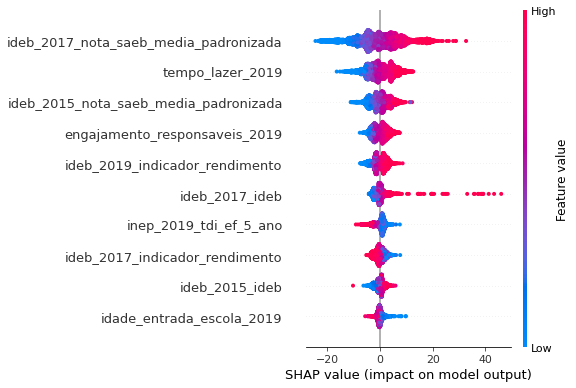

In [ ]:
shap.summary_plot(shap_values, X_train)

**Regressão linear em loop**

In [ ]:


regressorloop = LinearRegression()
r1 =  0
n_iteracoes = 1000
for i in range(n_iteracoes):
  # divisao aleatoria treino e teste 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  # regressão com todas as features
  regressorloop.fit(X_train, y_train)
  r1 += regressorloop.score(X_test, y_test)
print(f'Regressão com as novas features: R2 = {r1/n_iteracoes:.3}')


Regressão com as novas features: R2 = 0.804


In [ ]:
preditorrl =regressorloop.predict(X_test)

**Erro médio absoluto**

In [ ]:
mean_absolute_error(y_test, preditorrl)

7.584652000042671

**Erro médio quadrático**

In [ ]:
mean_squared_error(y_test, preditorrl)

97.19449603735582

**Raiz do erro médio quadrático**

In [ ]:
RMSErl = np.sqrt(mean_squared_error(y_test, preditorrl))
print('O valor do erro RMSE é: ', round(RMSErl,3))

O valor do erro RMSE é:  9.859


**Rede neural aplicada em regressão, com funções de ativação relu, 12, 5 1 um neurônio nas camadas, respectivamente, 300 épocas e taxa de aprendizado de 0,01. Estão sendo utilizados 20 % dos dados de treino para validação.**

In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(12, activation='relu', input_shape=[len(X_train.keys())]),
    layers.Dense(5, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.01)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model()

In [ ]:
EPOCHS = 300

history = model.fit(
  X_train.values, y_train.values,
  epochs=EPOCHS, validation_split = 0.2)

Epoch 1/300
196/196 [==============================] - 2s 4ms/step - loss: 13881.2773 - mae: 77.2804 - mse: 13881.2773 - val_loss: 161.2420 - val_mae: 9.9055 - val_mse: 161.2420
Epoch 2/300
196/196 [==============================] - 1s 3ms/step - loss: 163.1278 - mae: 10.0314 - mse: 163.1278 - val_loss: 159.3587 - val_mae: 9.8850 - val_mse: 159.3587
Epoch 3/300
196/196 [==============================] - 0s 3ms/step - loss: 154.3150 - mae: 9.7872 - mse: 154.3150 - val_loss: 147.2161 - val_mae: 9.3582 - val_mse: 147.2161
Epoch 4/300
196/196 [==============================] - 0s 2ms/step - loss: 140.4030 - mae: 9.2566 - mse: 140.4030 - val_loss: 128.8007 - val_mae: 8.8304 - val_mse: 128.8007
Epoch 5/300
196/196 [==============================] - 1s 3ms/step - loss: 131.7545 - mae: 8.9784 - mse: 131.7545 - val_loss: 120.8191 - val_mae: 8.4828 - val_mse: 120.8191
Epoch 6/300
196/196 [==============================] - 0s 2ms/step - loss: 127.8233 - mae: 8.8527 - mse: 127.8233 - val_loss: 116

**Gráficos do erro médio absoluto e do erro médio quadrático para a rede neural**

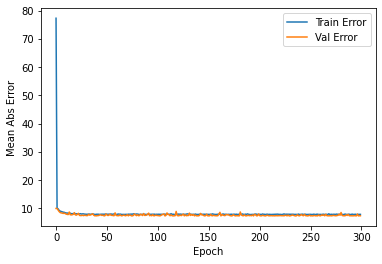

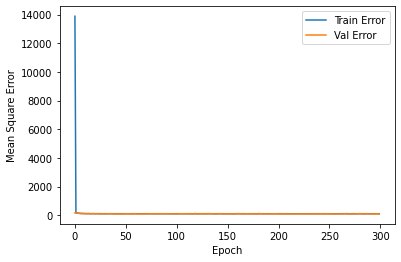

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.legend()
  plt.show()


plot_history(history)

**Previsões da rede neural**

In [ ]:
ypred=model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred)

0.8084544242689004

**Erro médio absoluto**

In [ ]:
mean_absolute_error(y_test, ypred)

7.523621210671238

**Erro médio quadrático**

In [ ]:
mean_squared_error(y_test, ypred)

95.52084839491845

**Raiz do erro médio quadrático**

In [ ]:
RMSErn = np.sqrt(mean_squared_error(y_test, ypred))
print('O valor do erro RMSE é: ', round(RMSErn,3))

O valor do erro RMSE é:  9.773


**Aplicação do XGBRegressor**

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [ ]:
modelxgb = XGBRegressor(objective='reg:squarederror')

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
n_scores = cross_val_score(modelxgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
modelxgb = XGBRegressor(objective='reg:squarederror')
modelxgb.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [ ]:
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -7.648 (0.191)


In [ ]:
yt = modelxgb.predict(X_test)
print('Prediction: %.3f' % yt[0])

Prediction: 202.387


In [ ]:
r2_score(y_test, yt)

0.8085814662121074

In [ ]:
yhat = modelxgb.predict(X_train)
print('Prediction: %.3f' % yhat[0])

Prediction: 243.479


In [ ]:
r2_score(y_train, yhat)

0.8300468537822201

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:
y_pred = cross_val_predict(modelxgb, X_test, y_test, cv=cv)

In [ ]:
r2_score(y_test, y_pred)

0.8044619701376954

**Erro médio absoluto**

In [ ]:
mean_absolute_error(y_test, yt)

7.516981103948349

**Erro médio quadrático**

In [ ]:
mean_squared_error(y_test, yt)

95.45749452130083

**Raiz do erro médio quadrático**

In [ ]:
RMSExgb = np.sqrt(mean_squared_error(y_test, yt))
print('O valor do erro RMSE é: ', round(RMSExgb,3))

O valor do erro RMSE é:  9.77


**Aplicação do modelo lightgbm**

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
modellgb = lgb.LGBMRegressor()
modellgb.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
predicttreino = modellgb.predict(X_train)

In [ ]:
predict = modellgb.predict(X_test)

In [ ]:
modellgb.score(X_train, y_train)

0.8757524944004134

In [ ]:
modellgb.score(X_test, y_test)

0.8008429977490075

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


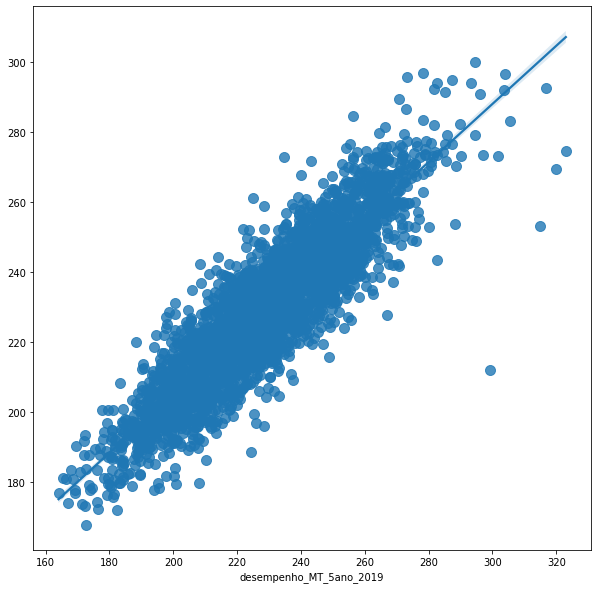

In [ ]:
plt.figure(figsize=(10,10))
sns.regplot(y_test, predict, fit_reg=True, scatter_kws={"s": 100})

**Aplicação do modelo SVM -> SVR**

In [ ]:
# Kernel rbf
from sklearn.svm import SVR
regressor_svr = SVR(kernel = 'rbf', C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.07, gamma='scale')
regressor_svr.fit(X_train, y_train)

SVR(C=10.0, epsilon=0.07)

In [ ]:
regressor_svr.predict(X_test)

array([0.43108009, 0.72768544, 0.43545388, ..., 0.4712678 , 0.30748192,
       0.48805648])

In [ ]:
regressor_svr.score(X_train, y_train)

0.8231330482904731

In [ ]:
regressor_svr.score(X_test, y_test)

0.8038372563705525

**Aplicação do modelo enable_hist_gradient_boosting**

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
modelhgb = HistGradientBoostingRegressor()
cvhgb = RepeatedKFold(n_splits=10, n_repeats=4, random_state=0)
n_scoreshgb = cross_val_score(modelhgb, X_train, y_train, scoring='neg_mean_absolute_error', cv=cvhgb, n_jobs=-1, error_score='raise')
print('MAE: %.3f (%.3f)' % (mean(n_scoreshgb), std(n_scoreshgb)))
# fit the model on the whole dataset
modelhgb = HistGradientBoostingRegressor()
modelhgb.fit(X_train, y_train)
yhathgb = modelhgb.predict(X_train)
print('Prediction: %.3f' % yhathgb[0])

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.


MAE: -7.666 (0.208)
Prediction: 229.139


In [ ]:
r2_score(y_train, yhathgb)

0.875897612441798

In [ ]:
yhgb = modelhgb.predict(X_test)
print('Prediction: %.3f' % yhgb[0])

Prediction: 250.530


In [ ]:
r2_score(y_test, yhgb)

0.801724484772762

**Modelos ensemble (em conjunto) para votação de regressores**

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
#, ('lr', reg3)
#('rf', reg2)
#('gb', reg1)
# Training classifiers
rh = HistGradientBoostingRegressor(random_state=0)
reg1 = GradientBoostingRegressor(random_state=0)
reg2 = RandomForestRegressor(random_state=0)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('hgb', rh), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)

In [ ]:
ytrainereg = ereg.predict(X_train)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, ytrainereg)

0.8431985234600539

In [ ]:
ytestereg = ereg.predict(X_test)

**Coeficiente de determinação R²**

In [ ]:
r2_score(y_test, ytestereg)

0.8111850706800421

**Erro médio absoluto**

In [ ]:
mean_absolute_error(y_test, ytestereg)

7.46805195900783

**Erro médio quadrático**

In [ ]:
mean_squared_error(y_test, ytestereg)

94.15911680251155

**Raiz do erro médio quadrático**

In [ ]:
RMSEes = np.sqrt(mean_squared_error(y_test, ytestereg))
print('O valor do erro RMSE é: ', round(RMSEes,3))

O valor do erro RMSE é:  9.704


**Função para aplicações de modelos lineares**

In [ ]:
def ApplyesKFold(x_axis, y_axis):
  # Linear Models.
  from sklearn.linear_model import LinearRegression
  from sklearn.linear_model import ElasticNet
  from sklearn.linear_model import Ridge
  from sklearn.linear_model import Lasso

  # Cross-Validation models.
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import KFold

  # KFold settings.
  kfold  = KFold(n_splits=10, shuffle=False) # shuffle=True, Shuffle (embaralhar) the data.

  # Axis
  x = x_axis
  y = y_axis

  # Models instances.
  linearRegression = LinearRegression()
  elasticNet       = ElasticNet()
  ridge            = Ridge()
  lasso            = Lasso()

  # Applyes KFold to models.
  linearRegression_result = cross_val_score(linearRegression, x, y, cv = kfold)
  elasticNet_result       = cross_val_score(elasticNet, x, y, cv = kfold)
  ridge_result            = cross_val_score(ridge, x, y, cv = kfold)
  lasso_result            = cross_val_score(lasso, x, y, cv = kfold)

  # Creates a dictionary to store Linear Models.
  dic_models = {
    "LinearRegression": linearRegression_result.mean(),
    "ElasticNet": elasticNet_result.mean(),
    "Ridge": ridge_result.mean(),
    "Lasso": lasso_result.mean()
  }
  # Select the best model.
  bestModel = max(dic_models, key=dic_models.get)

  print("Linear Regression Mean (R^2): {0}\nElastic Net Mean (R^2): {1}\nRidge Mean (R^2): {2}\nLasso Mean (R^2): {3}".format(linearRegression_result.mean(), elasticNet_result.mean(), ridge_result.mean(), lasso_result.mean()))
  print("The best model is: {0} with value: {1}".format(bestModel, dic_models[bestModel]))



ApplyesKFold(X_train, y_train)

Linear Regression Mean (R^2): 0.8024756860091392
Elastic Net Mean (R^2): 0.1850299176614862
Ridge Mean (R^2): 0.8024071390837448
Lasso Mean (R^2): 0.6411549438166544
The best model is: LinearRegression with value: 0.8024756860091392


**Também foram aplicados modelos de auto ml a titulo de comparação**

In [ ]:
data = df[['ideb_2015_ideb', 'ideb_2017_ideb', 'ideb_2019_indicador_rendimento', 'ideb_2017_nota_saeb_media_padronizada', 'ideb_2015_nota_saeb_media_padronizada',
'ideb_2017_indicador_rendimento', 'tempo_lazer_2019', 'inep_2019_tdi_ef_5_ano', 'engajamento_responsaveis_2019', 'idade_entrada_escola_2019', 'desempenho_MT_5ano_2019']]

In [ ]:
data_train = data.sample(frac = .7, random_state =0)

In [ ]:
data_test = data.drop(data_train.index)

In [ ]:
data_train.reset_index(drop=True, inplace=True)

In [ ]:
data_test.reset_index(drop=True, inplace=True)

In [ ]:
pip install pycaret --user

In [ ]:
pip install markupsafe==2.0.1

In [ ]:
import jinja2

In [ ]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
data.head()

,ideb_2015_ideb,ideb_2017_ideb,ideb_2019_indicador_rendimento,ideb_2017_nota_saeb_media_padronizada,ideb_2015_nota_saeb_media_padronizada,ideb_2017_indicador_rendimento,tempo_lazer_2019,inep_2019_tdi_ef_5_ano,engajamento_responsaveis_2019,idade_entrada_escola_2019,desempenho_MT_5ano_2019
id_escola,,,,,,,,,,,
12023531,4.2,5.3,0.933664,5.976847,4.991741,0.892854,1.098592,19.7,2.404930,1.154930,206.353100
12048224,5.7,5.5,0.997373,5.817718,6.046465,0.944313,1.450549,16.0,2.662088,1.010989,221.439707
12015873,5.7,5.8,0.983606,6.037207,5.932558,0.963198,1.576923,7.7,2.725962,0.634615,226.573946
12016438,7.6,7.9,0.980807,8.289673,7.874890,0.958912,1.779070,5.5,2.747093,0.860465,288.757271
12016535,5.7,6.7,0.981414,6.828136,6.143776,0.977446,1.471264,9.8,2.617816,1.091954,243.453455


In [ ]:
regscsc = setup(data = data, 
            target ='desempenho_MT_5ano_2019',
            session_id = 0,
            fold=10,
            #remove_multicollinearity = True,
            #multicollinearity_threshold = 0.1,
            normalize = True,
            normalize_method = 'minmax',
            #feature_selection	= True,
            #feature_selection_threshold = 0.99

            )

,Description,Value
0,session_id,0
1,Target,desempenho_MT_5ano_2019
2,Original Data,"(11166, 11)"
3,Missing Values,False
4,Numeric Features,10
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7816, 10)"


In [ ]:
best_model = compare_models(exclude=["ransac"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,7.5565,95.5705,9.7696,0.8082,0.0426,0.0332,1.470
lr,Linear Regression,7.6046,96.9680,9.8394,0.8055,0.0429,0.0334,0.556
br,Bayesian Ridge,7.6051,96.9682,9.8394,0.8055,0.0429,0.0334,0.018
ridge,Ridge Regression,7.6088,97.0034,9.8412,0.8054,0.0429,0.0335,0.038
huber,Huber Regressor,7.5999,97.0948,9.8456,0.8052,0.0429,0.0334,0.148
catboost,CatBoost Regressor,7.6540,98.1201,9.8998,0.8031,0.0432,0.0337,5.173
lightgbm,Light Gradient Boosting Machine,7.7158,99.0932,9.9488,0.8012,0.0434,0.0339,0.188
et,Extra Trees Regressor,7.7375,99.4230,9.9631,0.8006,0.0435,0.0341,1.849
rf,Random Forest Regressor,7.7663,99.7097,9.9780,0.8000,0.0436,0.0342,4.753
knn,K Neighbors Regressor,8.3319,114.5181,10.6900,0.7703,0.0467,0.0367,0.071


In [ ]:
gbr = create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.9686,106.1413,10.3025,0.7949,0.0447,0.0351
1,7.7959,100.8468,10.0423,0.7726,0.0436,0.0341
2,7.4901,96.3000,9.8133,0.8095,0.0428,0.0328
3,7.1449,83.6849,9.1479,0.8242,0.0396,0.0314
4,7.3521,89.1432,9.4416,0.8323,0.0413,0.0324
5,7.5585,92.5849,9.6221,0.8177,0.0424,0.0334
6,7.3658,88.5707,9.4112,0.8229,0.0413,0.0327
7,7.4875,97.0517,9.8515,0.8084,0.0428,0.0329
8,7.6951,105.1039,10.2520,0.7999,0.0443,0.0338


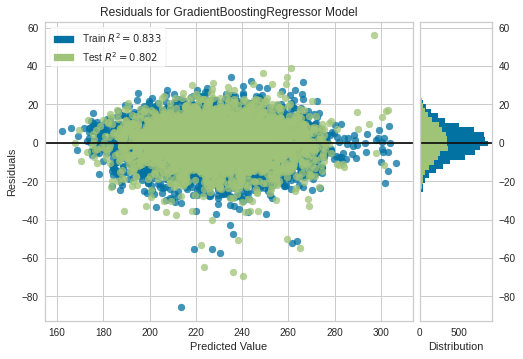

In [ ]:
plot_model(gbr)

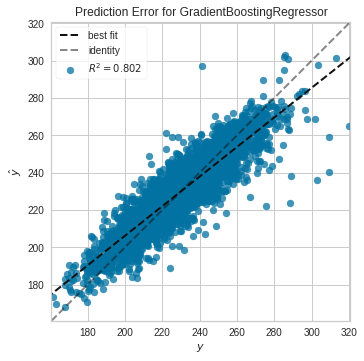

In [ ]:
plot_model(gbr, plot="error")

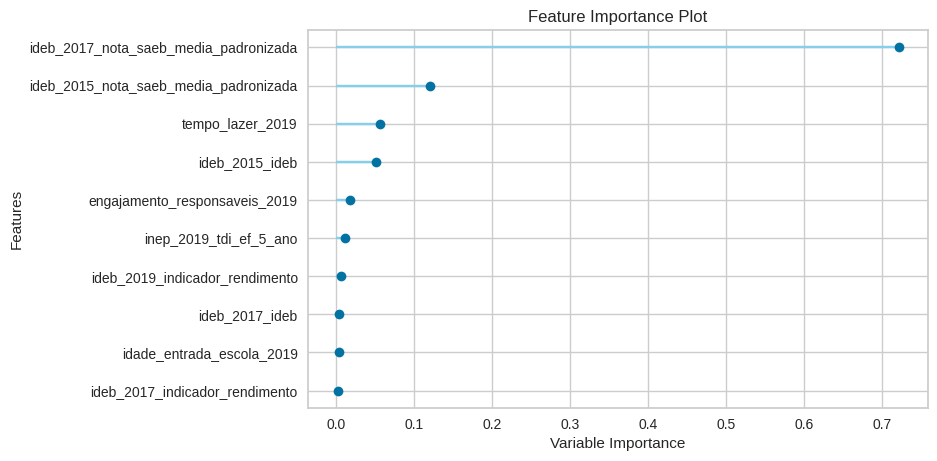

In [ ]:
plot_model(gbr, plot="feature")

In [ ]:
predi_modeltreino = predict_model(gbr)
predi_modeltreino

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,7.7134,102.1208,10.1055,0.8021,0.0437,0.0338


,ideb_2015_ideb,ideb_2017_ideb,ideb_2019_indicador_rendimento,ideb_2017_nota_saeb_media_padronizada,ideb_2015_nota_saeb_media_padronizada,ideb_2017_indicador_rendimento,tempo_lazer_2019,inep_2019_tdi_ef_5_ano,engajamento_responsaveis_2019,idade_entrada_escola_2019,desempenho_MT_5ano_2019,Label
0,0.297297,0.442857,0.845513,0.436524,0.283894,0.827411,0.782853,0.256598,0.848355,0.162979,214.217484,225.009702
1,0.689189,0.742857,0.965294,0.737756,0.659348,0.952443,0.906426,0.049853,0.877686,0.198124,284.399719,271.363770
2,0.405405,0.371429,0.913443,0.377502,0.395044,0.736460,0.789807,0.360704,0.926521,0.299354,209.026367,226.879215
3,0.486486,0.500000,0.872450,0.495566,0.461432,0.839140,0.779762,0.347507,0.826146,0.318574,236.305191,234.445538
4,0.554054,0.657143,0.990258,0.615461,0.510166,0.969761,0.886600,0.146628,0.924832,0.532523,256.930634,258.944596
...,...,...,...,...,...,...,...,...,...,...,...,...
3345,0.432432,0.500000,0.939084,0.456277,0.369689,0.913872,0.739583,0.153959,0.891124,0.282466,223.847702,231.664926
3346,0.243243,0.228571,0.886533,0.168152,0.164937,0.777223,0.617708,0.316716,0.812211,0.304521,197.920776,197.244037
3347,0.472973,0.557143,0.992055,0.525087,0.386452,0.933681,0.777590,0.055718,0.789905,0.414430,247.049225,235.201839
3348,0.216216,0.342857,0.822080,0.346352,0.256274,0.740619,0.662879,0.637830,0.603789,0.379939,204.680054,209.281580


In [ ]:
predi_model_teste = predict_model(gbr, data=data_test)
predi_model_teste

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,7.0979,83.8613,9.1576,0.8333,0.04,0.0313


,ideb_2015_ideb,ideb_2017_ideb,ideb_2019_indicador_rendimento,ideb_2017_nota_saeb_media_padronizada,ideb_2015_nota_saeb_media_padronizada,ideb_2017_indicador_rendimento,tempo_lazer_2019,inep_2019_tdi_ef_5_ano,engajamento_responsaveis_2019,idade_entrada_escola_2019,desempenho_MT_5ano_2019,Label
0,4.2,5.3,0.933664,5.976847,4.991741,0.892854,1.098592,19.7,2.404930,1.154930,206.353100,210.921219
1,5.7,5.8,0.983606,6.037207,5.932558,0.963198,1.576923,7.7,2.725962,0.634615,226.573946,229.768074
2,7.6,7.9,0.980807,8.289673,7.874890,0.958912,1.779070,5.5,2.747093,0.860465,288.757271,283.646442
3,5.9,6.6,1.000000,6.712805,6.008362,0.976826,1.380952,12.1,2.583333,0.619048,229.776904,237.328709
4,6.1,6.5,0.985558,6.565507,6.323041,0.988525,1.842857,9.2,2.878571,0.671429,245.104993,250.273144
...,...,...,...,...,...,...,...,...,...,...,...,...
3345,4.4,4.9,0.902910,5.313627,4.970264,0.928162,1.346535,16.7,2.440594,1.019802,202.719689,206.980674
3346,4.1,3.6,0.924585,4.401137,4.302431,0.826143,1.338028,22.7,2.570423,1.056338,197.160554,197.535601
3347,4.5,3.6,0.870891,4.609154,5.043770,0.790983,0.961538,41.7,2.725962,1.096154,190.288233,189.960558
3348,7.0,7.5,0.996347,7.543629,7.085975,0.991094,1.762712,0.0,2.805085,1.338983,269.269044,262.128265


**Usando modelos emsemble com os atributos e o target normalizados**

In [ ]:
df.shape

(11166, 234)

In [ ]:
dfnovo=df.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
escalonamentodfnovo = MinMaxScaler(feature_range= (0,1))
dfnovo = pd.DataFrame(escalonamentodfnovo.fit_transform(dfnovo), columns=dfnovo.columns)

In [ ]:
Xnovo = dfnovo[['ideb_2015_ideb', 'ideb_2017_ideb', 'ideb_2019_indicador_rendimento', 'ideb_2017_nota_saeb_media_padronizada', 'ideb_2015_nota_saeb_media_padronizada',
'ideb_2017_indicador_rendimento', 'tempo_lazer_2019', 'inep_2019_tdi_ef_5_ano', 'engajamento_responsaveis_2019', 'idade_entrada_escola_2019']]

In [ ]:
ynovo = dfnovo['desempenho_MT_5ano_2019']

In [ ]:
X_trainn, X_testn, y_trainn, y_testn = train_test_split(Xnovo, ynovo, test_size=0.3, random_state=0)
X_trainn.shape, X_testn.shape

((7816, 10), (3350, 10))

In [ ]:
ytestereg = ereg.predict(X_testn)

In [ ]:
r2_score(y_testn, ytestereg)

0.802759453516282

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)

xgb_grid.fit(X_train, y_train)

xgb_cv = (xgb_grid.best_estimator_)

eval_set = [(X_train, y_train),
            (X_test, y_test)]

fit_model = xgb_cv.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    eval_metric='mse',
    early_stopping_rounds=50,
    verbose=False)

print("MAE:", mean_absolute_error(y_test, fit_model.predict(X_test)))
print("MSE:", mean_squared_error(y_test, fit_model.predict(X_test)))
print("R2:", r2_score(y_test, fit_model.predict(X_test)))